In [1]:
%matplotlib nbagg
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import scipy as sp
from scipy.fftpack import fft,fftfreq,ifft,rfft,rfftfreq,irfft


In [2]:
dataFile = "Sample-Data/28A18305A90B_20180315175916.csv"#r"Sample-Data/28A18305A90B_20180315175916.csv"
df = pd.read_csv(dataFile,skiprows=5)
df

,//ARTIFACT,NUM,DATE,ACC_X,ACC_Y,ACC_Z,EOG_L1,EOG_R1,EOG_L2,EOG_R2,EOG_H1,EOG_H2,EOG_V1,EOG_V2
0,NaN,1,2018/03/15 17:59:16.13,-380,2276,-16281,138,170,-11,20,-32,-31,-154,-4
1,NaN,2,2018/03/15 17:59:16.15,-391,2195,-16210,48,73,114,145,-25,-31,-60,-129
2,NaN,3,2018/03/15 17:59:16.17,-357,2205,-16157,-35,-8,142,172,-27,-30,21,-157
3,NaN,4,2018/03/15 17:59:16.19,-372,2304,-16237,-3,28,37,62,-31,-25,-12,-49
4,NaN,5,2018/03/15 17:59:16.21,-309,2317,-16326,113,150,-44,-15,-37,-29,-131,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13271,NaN,13272,2018/03/15 18:03:41.55,-13569,-9924,-1821,-42,25,-75,93,-67,-168,8,-9
13272,NaN,13273,2018/03/15 18:03:41.57,-13568,-9772,-2391,-26,80,-40,92,-106,-132,-27,-26
13273,NaN,13274,2018/03/15 18:03:41.59,-14104,-9757,-1642,-81,119,-21,54,-200,-75,-19,-16
13274,NaN,13275,2018/03/15 18:03:41.61,-14243,-9949,-1567,-63,90,-31,61,-153,-92,-13,-15


In [3]:
df.dtypes

//ARTIFACT    float64
NUM             int64
DATE           object
ACC_X           int64
ACC_Y           int64
ACC_Z           int64
EOG_L1          int64
EOG_R1          int64
EOG_L2          int64
EOG_R2          int64
EOG_H1          int64
EOG_H2          int64
EOG_V1          int64
EOG_V2          int64
dtype: object

In [4]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.drop(['//ARTIFACT','NUM'],axis=1,inplace=True)


In [5]:
df.head()

,DATE,ACC_X,ACC_Y,ACC_Z,EOG_L1,EOG_R1,EOG_L2,EOG_R2,EOG_H1,EOG_H2,EOG_V1,EOG_V2
0,2018-03-15 17:59:16.130,-380,2276,-16281,138,170,-11,20,-32,-31,-154,-4
1,2018-03-15 17:59:16.150,-391,2195,-16210,48,73,114,145,-25,-31,-60,-129
2,2018-03-15 17:59:16.170,-357,2205,-16157,-35,-8,142,172,-27,-30,21,-157
3,2018-03-15 17:59:16.190,-372,2304,-16237,-3,28,37,62,-31,-25,-12,-49
4,2018-03-15 17:59:16.210,-309,2317,-16326,113,150,-44,-15,-37,-29,-131,29


In [6]:
df.set_index("DATE",inplace=True)

In [7]:
df.head()

,ACC_X,ACC_Y,ACC_Z,EOG_L1,EOG_R1,EOG_L2,EOG_R2,EOG_H1,EOG_H2,EOG_V1,EOG_V2
DATE,,,,,,,,,,,
2018-03-15 17:59:16.130,-380,2276,-16281,138,170,-11,20,-32,-31,-154,-4
2018-03-15 17:59:16.150,-391,2195,-16210,48,73,114,145,-25,-31,-60,-129
2018-03-15 17:59:16.170,-357,2205,-16157,-35,-8,142,172,-27,-30,21,-157
2018-03-15 17:59:16.190,-372,2304,-16237,-3,28,37,62,-31,-25,-12,-49
2018-03-15 17:59:16.210,-309,2317,-16326,113,150,-44,-15,-37,-29,-131,29


In [8]:
d = (df.index[1]-df.index[0])
print(d)
d = float((d.microseconds)/10**6)
d

0 days 00:00:00.020000


0.02

In [9]:
#https://www.kaggle.com/theoviel/fast-fourier-transform-denoising
def filter_signal(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/len(signal))
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [10]:
#https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/
def applyfft(EOG_signal,d):
    fft_EOG_signal = fft(EOG_signal)
    psd_EOG_signal = np.abs(fft_EOG_signal)**2
    fft_freq = fftfreq(len(EOG_signal),d=d)
    i = fft_freq > 0
    psd_EOG_signal_p = 10*np.log10(psd_EOG_signal[i])# p - positive axis
    fft_freq_p = fft_freq[i]
    psd_EOG_signal_n = fft_freq_p[psd_EOG_signal_p ==np.max(psd_EOG_signal_p)] # n - noise 
    if np.where(psd_EOG_signal_p==np.amax(psd_EOG_signal_p))[0]:
        temp_fft_EOG_signal = fft_EOG_signal.copy()
        temp_fft_EOG_signal[np.abs(fft_freq)>psd_EOG_signal_n]=0
        t_EOG_signal = np.real(ifft(temp_fft_EOG_signal))        
        return t_EOG_signal
    else:
        return filter_signal(EOG_signal,1e5)

In [11]:
def applyPSDsignal(EOG_signal,d):
    fft_EOG_signal = fft(EOG_signal)
    psd_EOG_signal = np.abs(fft_EOG_signal)**2
    fft_freq = fftfreq(len(EOG_signal),d=d)
    i = fft_freq > 0
    psd_EOG_signal_p = 10*np.log10(psd_EOG_signal[i])# p - positive axis
    fft_freq_p = fft_freq[i]
    plt.figure(figsize=(10,5))
    plt.plot(fft_freq_p,psd_EOG_signal_p)
    plt.grid()
    plt.xlabel('Frequency')
    plt.ylabel('PSD (dB)')
    plt.legend(['EOG'],loc='upper right')
    plt.show()
    

In [12]:
def applyFFTsignal(EOG_signal,d):
    fft_EOG_signal = fft(EOG_signal)
    psd_EOG_signal = np.abs(fft_EOG_signal)**2
    fft_freq = fftfreq(len(EOG_signal),d=d)
    i = fft_freq > 0
#     psd_EOG_signal_p = 10*np.log10(psd_EOG_signal[i])# p - positive axis
    fft_EOG_signal_p = np.real(fft_EOG_signal[i])
    fft_freq_p = fft_freq[i]
    plt.figure(figsize=(10,5))
    plt.plot(fft_freq_p,fft_EOG_signal_p)
    plt.grid()
    plt.xlabel('Frequency')
    plt.ylabel('FFT')
    plt.legend(['EOG'],loc='upper right')
    plt.show()

In [13]:
# applyFFTsignal(df["ACC_X"],d)

In [14]:
filtered_df = pd.DataFrame()
for sgnl in df.columns:
#     print(sgnl)
    if filtered_df.empty:
        filtered_df["DATE"] = df.index
    
    filtered_df["fft_"+sgnl] = applyfft(df[sgnl],d)
filtered_df.set_index("DATE",inplace=True)
filtered_df.head()

,fft_ACC_X,fft_ACC_Y,fft_ACC_Z,fft_EOG_L1,fft_EOG_R1,fft_EOG_L2,fft_EOG_R2,fft_EOG_H1,fft_EOG_H2,fft_EOG_V1,fft_EOG_V2
DATE,,,,,,,,,,,
2018-03-15 17:59:16.130,-5031.530488,-1854.831308,-11181.541404,13.238364,49.543267,22.621616,179.158617,-60.157618,-46.413868,-30.805623,-132.274293
2018-03-15 17:59:16.150,-1333.090572,1307.920510,-15083.563689,34.407926,-69.796559,52.192569,224.453483,-25.885955,-25.744726,66.341131,-188.073304
2018-03-15 17:59:16.170,722.751537,3067.154844,-17336.322797,51.089234,10.759029,68.317855,74.713422,-9.851146,-20.159588,-4.977325,-71.046025
2018-03-15 17:59:16.190,963.595303,3327.963228,-17699.542463,58.771960,175.569054,67.504865,-55.410846,-15.237834,-26.617939,-150.241810,45.196270
2018-03-15 17:59:16.210,83.959687,2670.230568,-16826.807771,57.417828,197.564345,55.858920,11.176105,-31.943244,-35.241551,-169.505013,-0.592815


In [15]:
df.head()

,ACC_X,ACC_Y,ACC_Z,EOG_L1,EOG_R1,EOG_L2,EOG_R2,EOG_H1,EOG_H2,EOG_V1,EOG_V2
DATE,,,,,,,,,,,
2018-03-15 17:59:16.130,-380,2276,-16281,138,170,-11,20,-32,-31,-154,-4
2018-03-15 17:59:16.150,-391,2195,-16210,48,73,114,145,-25,-31,-60,-129
2018-03-15 17:59:16.170,-357,2205,-16157,-35,-8,142,172,-27,-30,21,-157
2018-03-15 17:59:16.190,-372,2304,-16237,-3,28,37,62,-31,-25,-12,-49
2018-03-15 17:59:16.210,-309,2317,-16326,113,150,-44,-15,-37,-29,-131,29


In [16]:
df.describe()

,ACC_X,ACC_Y,ACC_Z,EOG_L1,EOG_R1,EOG_L2,EOG_R2,EOG_H1,EOG_H2,EOG_V1,EOG_V2
count,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000
mean,-1468.331425,5603.081199,-14321.289319,-14.972130,79.423396,-15.054610,79.367882,-94.395526,-94.422492,-32.107261,-32.039997
std,2984.298435,3691.873722,3225.953578,261.942142,242.145607,261.596806,242.310094,272.855911,272.223227,212.069421,212.146189
min,-32767.000000,-14604.000000,-29666.000000,-2048.000000,-2048.000000,-2048.000000,-2048.000000,-3853.000000,-3854.000000,-1894.000000,-1893.000000
25%,-2727.000000,2534.000000,-16192.000000,-56.000000,30.000000,-57.000000,32.000000,-154.000000,-154.000000,-80.000000,-80.000000
50%,-402.500000,5660.500000,-15189.000000,-29.000000,97.000000,-28.000000,97.000000,-91.000000,-89.000000,-33.000000,-34.000000
75%,107.250000,9135.000000,-13285.000000,47.000000,131.000000,47.000000,131.000000,-34.000000,-34.000000,4.000000,4.000000
max,19662.000000,22075.000000,32767.000000,2026.000000,1821.000000,2024.000000,1824.000000,4074.000000,4072.000000,2040.000000,2040.000000


In [17]:
filtered_df.describe()

,fft_ACC_X,fft_ACC_Y,fft_ACC_Z,fft_EOG_L1,fft_EOG_R1,fft_EOG_L2,fft_EOG_R2,fft_EOG_H1,fft_EOG_H2,fft_EOG_V1,fft_EOG_V2
count,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000,13276.000000
mean,-1468.331425,5603.081199,-14321.289319,-14.972130,79.423396,-15.054610,79.367882,-94.395526,-94.422492,-32.107261,-32.039997
std,2854.935665,3674.736348,3160.273734,248.567531,236.186775,248.375006,236.223562,261.217589,261.004893,206.402898,206.171801
min,-24774.313210,-12697.695398,-23285.360129,-2427.117651,-2466.039011,-2444.013352,-2447.760334,-4203.674931,-4185.316703,-2132.343089,-2124.959648
25%,-2725.988446,2536.204379,-16189.445996,-49.249684,43.928866,-48.899637,43.864214,-152.954655,-153.153312,-75.488122,-75.422602
50%,-470.075090,5653.967188,-15183.634423,-6.872843,89.210779,-6.968932,88.811412,-90.552533,-90.919353,-37.692479,-37.568022
75%,105.140970,9135.607911,-13287.736223,42.654635,123.568316,42.339062,124.685521,-33.390424,-33.322868,-2.772454,-2.230500
max,7680.037385,21552.253327,23060.532557,2443.053118,2250.955813,2459.124638,2260.032500,4305.550972,4383.768500,2456.763310,2403.935696


In [18]:
for sgnl in df.columns:
    print("---------- "+sgnl+" ----------")
    print(np.corrcoef(filtered_df["fft_"+sgnl],df[sgnl]))
    print(" ")

---------- ACC_X ----------
[[1.        0.9566522]
 [0.9566522 1.       ]]
 
---------- ACC_Y ----------
[[1.         0.99535808]
 [0.99535808 1.        ]]
 
---------- ACC_Z ----------
[[1.         0.97964018]
 [0.97964018 1.        ]]
 
---------- EOG_L1 ----------
[[1.         0.94894059]
 [0.94894059 1.        ]]
 
---------- EOG_R1 ----------
[[1.         0.97539153]
 [0.97539153 1.        ]]
 
---------- EOG_L2 ----------
[[1.         0.94945734]
 [0.94945734 1.        ]]
 
---------- EOG_R2 ----------
[[1.         0.97488123]
 [0.97488123 1.        ]]
 
---------- EOG_H1 ----------
[[1.         0.95734627]
 [0.95734627 1.        ]]
 
---------- EOG_H2 ----------
[[1.         0.95878995]
 [0.95878995 1.        ]]
 
---------- EOG_V1 ----------
[[1.         0.97327987]
 [0.97327987 1.        ]]
 
---------- EOG_V2 ----------
[[1.         0.97183834]
 [0.97183834 1.        ]]
 


In [19]:
nameFile = dataFile.split("/")[1]
nameFile = nameFile.split(".")[0]
nameFile

'28A18305A90B_20180315175916'

<IPython.core.display.Javascript object>


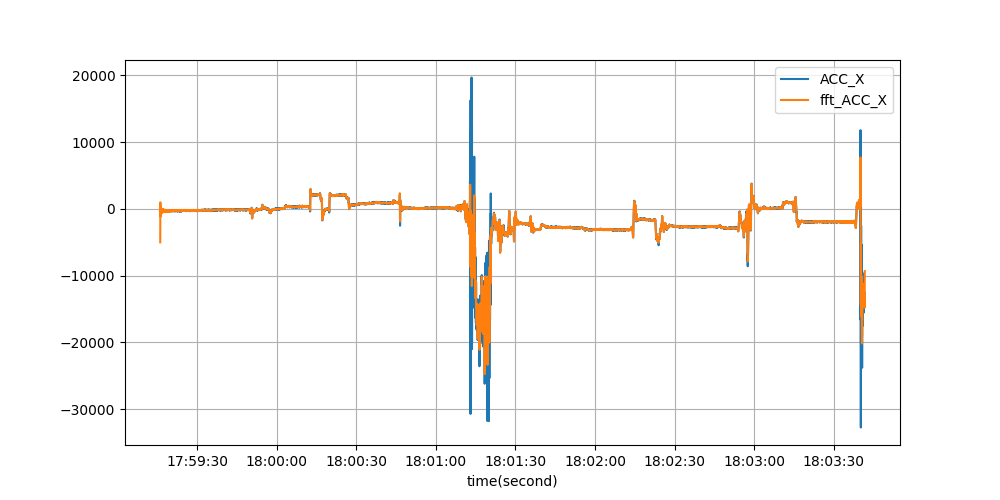

/home/ashutosh/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


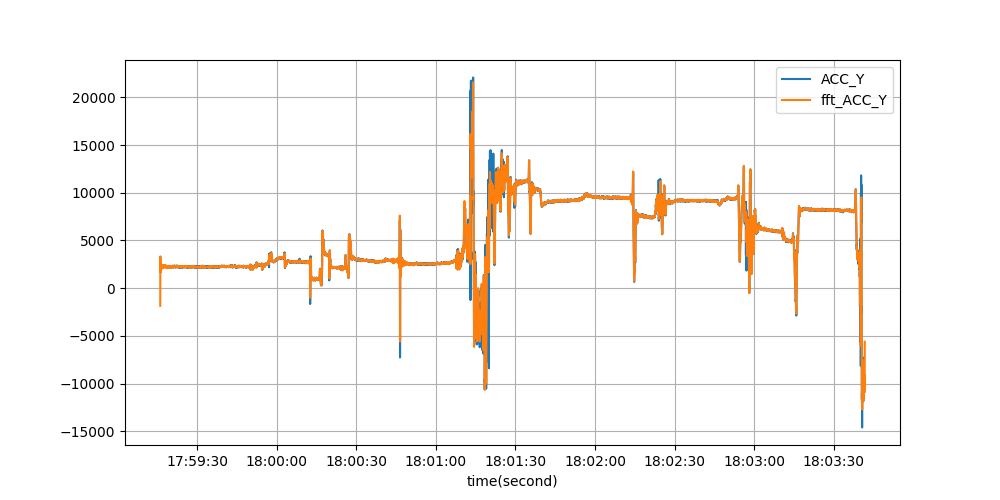

<IPython.core.display.Javascript object>


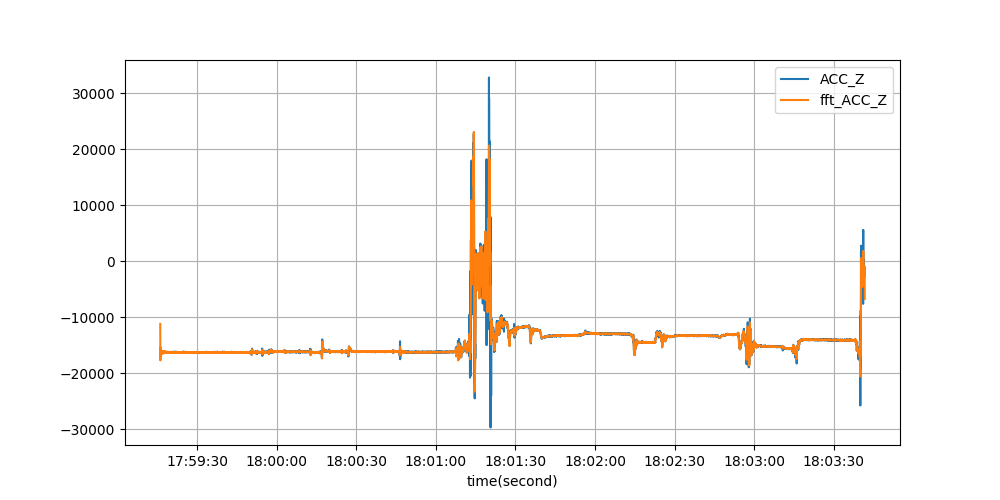

<IPython.core.display.Javascript object>


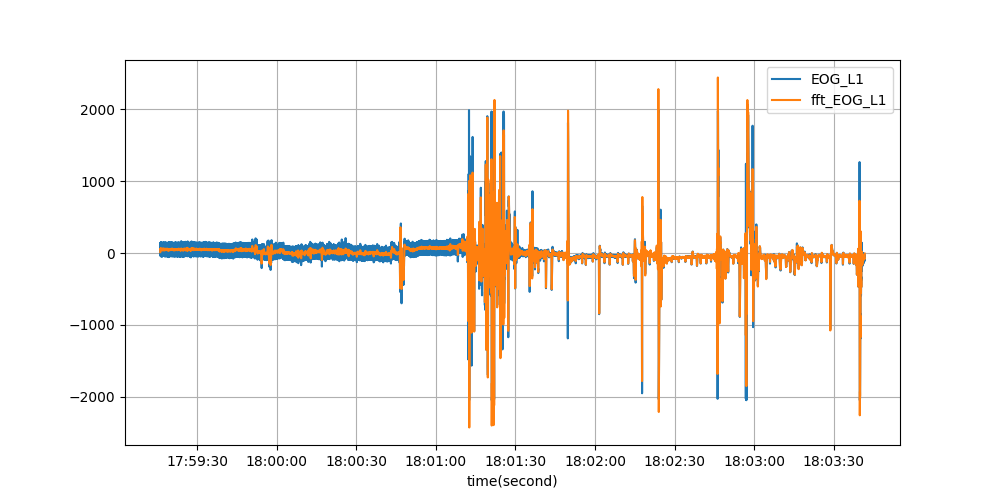

<IPython.core.display.Javascript object>


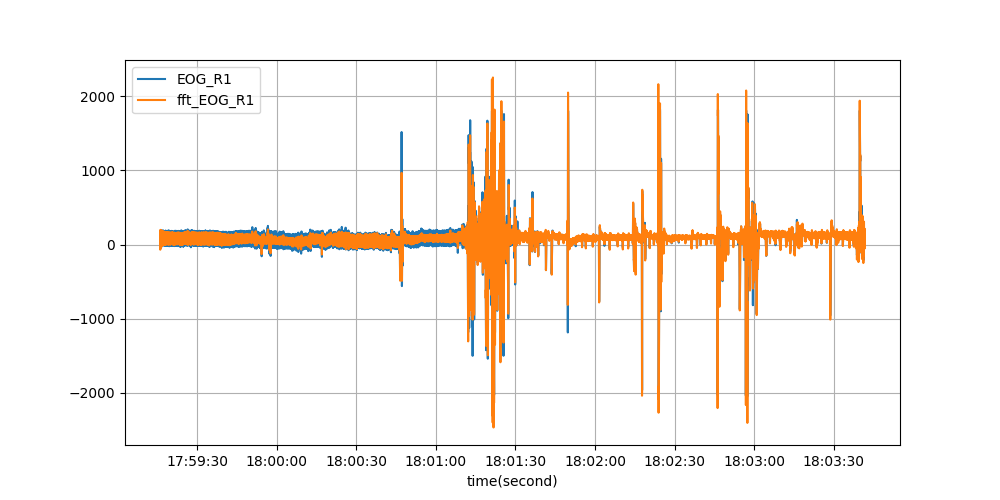

<IPython.core.display.Javascript object>


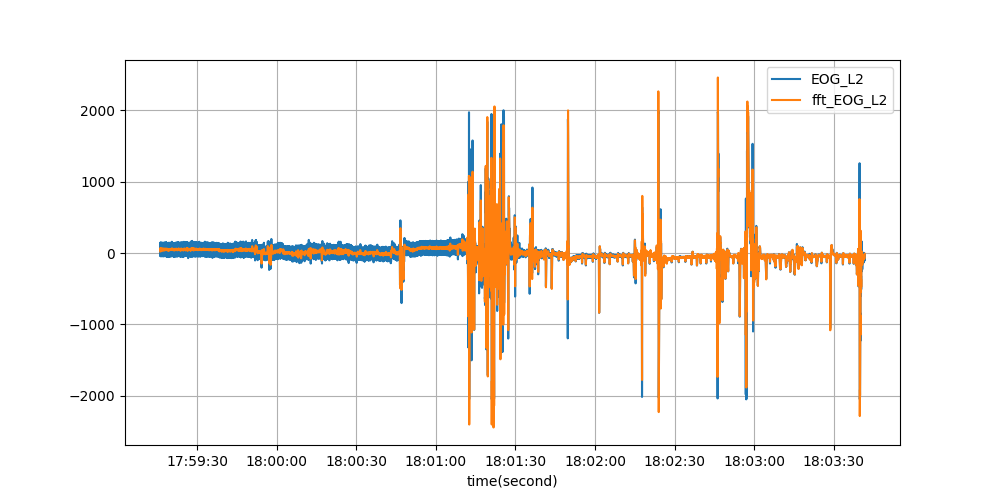

<IPython.core.display.Javascript object>


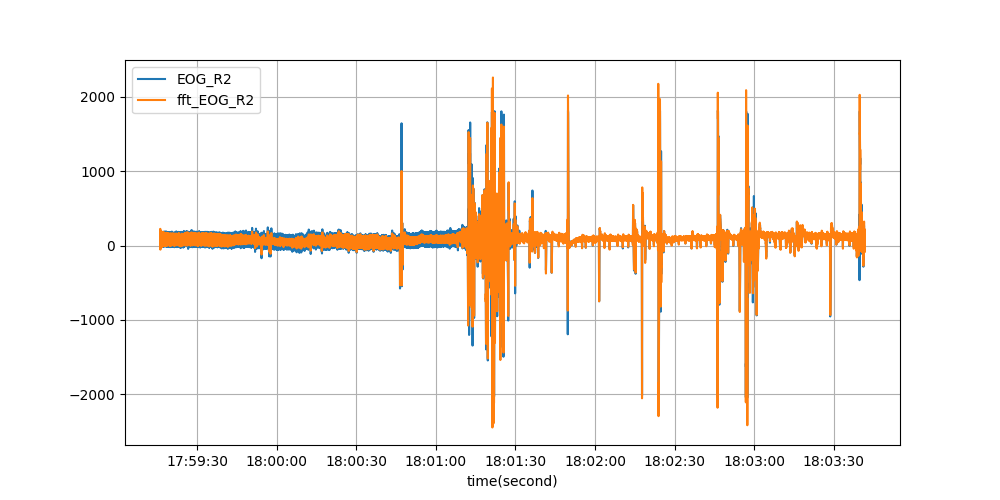

<IPython.core.display.Javascript object>


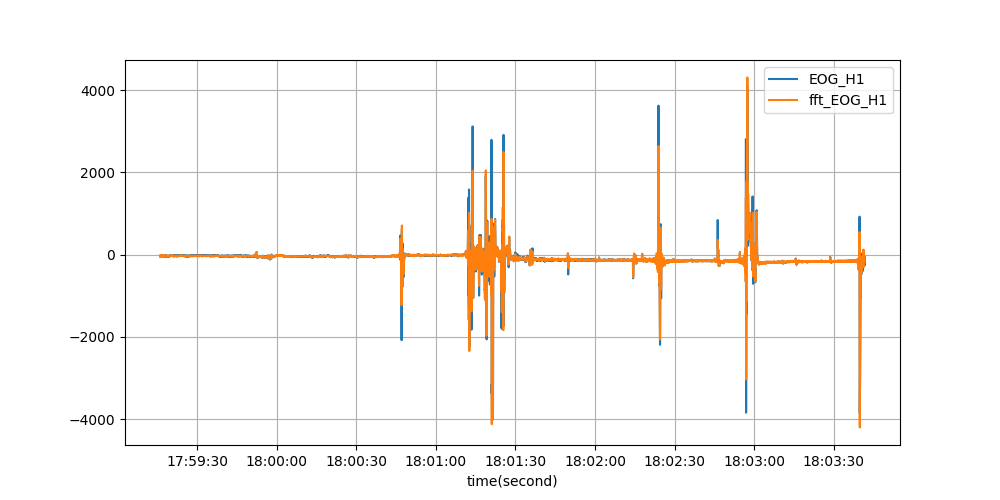

<IPython.core.display.Javascript object>


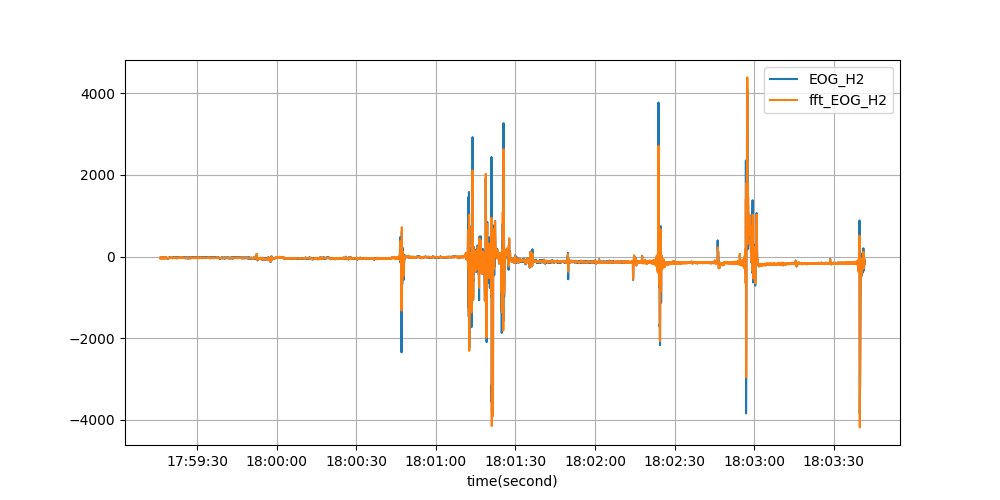

<IPython.core.display.Javascript object>


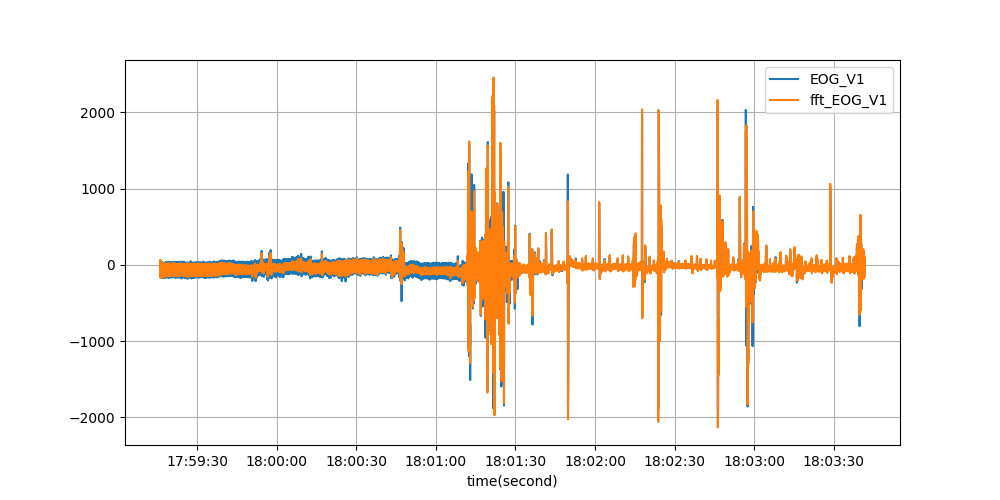

<IPython.core.display.Javascript object>


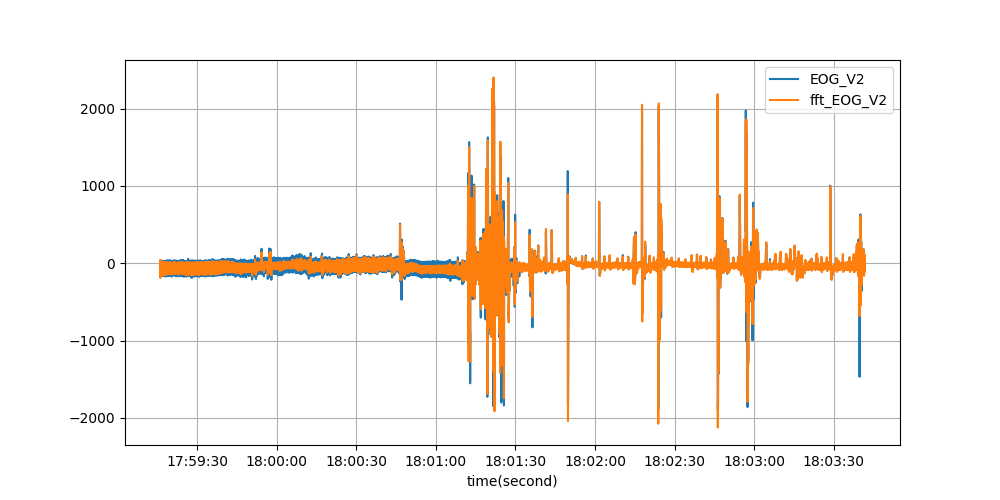

In [20]:
for sgnl in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index,df[sgnl],label = sgnl)
    plt.plot(df.index,filtered_df["fft_"+sgnl],label = "fft_"+sgnl)
    plt.grid()
    plt.xlabel('time(second)')
    plt.legend()
    plt.show()